### Load the Dataset

In [1]:
%pip install kagglehub pandas

import kagglehub
import pandas as pd
import os

# Download the dataset
dataset_path = kagglehub.dataset_download("sumitm004/arxiv-scientific-research-papers-dataset")

# Assuming the downloaded file is a CSV and finding the filename
# List files in the downloaded directory
files = os.listdir(dataset_path)
csv_file = None
for file in files:
    if file.endswith('.csv'):
        csv_file = file
        break

if not csv_file: raise "No CSV file found in the downloaded dataset."

file_path = os.path.join(dataset_path, csv_file)
# Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
display(df.head())

# Display information about the DataFrame
print("\nInformation about the DataFrame:")
df.info()

Note: you may need to restart the kernel to use updated packages.
First 5 rows of the DataFrame:


id                                              title  \
0  cs-9308101v1                               Dynamic Backtracking   
1  cs-9308102v1  A Market-Oriented Programming Environment and ...   
2  cs-9309101v1            An Empirical Analysis of Search in GSAT   
3  cs-9311101v1  The Difficulties of Learning Logic Programs wi...   
4  cs-9311102v1  Software Agents: Completing Patterns and Const...   

                  category category_code published_date updated_date  \
0  Artificial Intelligence         cs.AI         8/1/93       8/1/93   
1  Artificial Intelligence         cs.AI         8/1/93       8/1/93   
2  Artificial Intelligence         cs.AI         9/1/93       9/1/93   
3  Artificial Intelligence         cs.AI        11/1/93      11/1/93   
4  Artificial Intelligence         cs.AI        11/1/93      11/1/93   

                                          authors       first_author  \
0                              ['M. L. Ginsberg']   'M. L. Ginsberg'   
1                               ['M. P. Wellman']    'M. P. Wellman'   
2                      ['I. P. Gent', 'T. Walsh']       'I. P. Gent'   
3  ['F. Bergadano', 'D. Gunetti', 'U. Trinchero']     'F. Bergadano'   
4            ['J. C. Schlimmer', 'L. A. Hermens']  'J. C. Schlimmer'   

                                             summary  summary_word_count  
0  Because of their occasional need to return to ...                  79  
1  Market price systems constitute a well-underst...                 119  
2  We describe an extensive study of search in GS...                 167  
3  As real logic programmers normally use cut (!)...                 174  
4  To support the goal of allowing users to recor...                 187


Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136238 entries, 0 to 136237
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  136238 non-null  object
 1   title               136238 non-null  object
 2   category            136238 non-null  object
 3   category_code       136238 non-null  object
 4   published_date      136238 non-null  object
 5   updated_date        136238 non-null  object
 6   authors             136238 non-null  object
 7   first_author        136238 non-null  object
 8   summary             136238 non-null  object
 9   summary_word_count  136238 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 10.4+ MB


In [2]:
def parse_date(string: str):
    match list(map(int, string.split("/"))):
        case [month, day, year] if year >= 50:
            return (month, day, 1900 + year)
        case [month, day, year] if year <= 50:
            return (month, day, 2000 + year)
        case v:
            print(f"Unknown format: {v}")
            return None

In [3]:
import pandas as pd
from collections import defaultdict

# Get all unique years from the dataset
all_years = { y for _, _, y in map(parse_date, list(df["published_date"])) if isinstance(y, int) }

if not all_years:
    print("No valid years found in the dataset.")
    grouped_documents = {}
else:
    # Initialize the dictionary to hold the grouped series of documents
    buckets = {
        2000 + 2004j,
        2005 + 2009j,
        2010 + 2014j,
        2015 + 2019j,
        2020 + 2025j,
        1900 + 1999j
    }
    grouped_series = defaultdict(list)

    # Group documents into 5-year buckets for years >= 2000
    latest_year = max(all_years)
    for index, docu in df.iterrows():
        parsed_date = parse_date(docu["published_date"])
        if not parsed_date: continue

        _, _, year = parsed_date
        for bucket_bound in buckets:
            if bucket_bound.real <= year <= bucket_bound.imag:
                group_name = f"{int(bucket_bound.real)}-{int(bucket_bound.imag)}"
                grouped_series[group_name].append(docu)

    # Convert the lists of documents into DataFrames
    grouped_documents = { y: pd.DataFrame(v) for y, v in grouped_series.items() }

    # Print the head of the first group to verify
    if grouped_documents:
        first_group_name = sorted(grouped_documents.keys(), reverse=True)[0]
        print(f"Documents from group: {first_group_name}")
        display(grouped_documents[first_group_name].head())
    else:
        print("No documents were grouped.")

Documents from group: 2020-2025


id                                              title  \
3464  abs-2002.00429v2                 Uncertainty Weighted Causal Graphs   
3465  abs-2002.00434v2  Integrating Deep Reinforcement Learning with M...   
3466  abs-2002.00509v2  A Machine Consciousness architecture based on ...   
3467  abs-2002.01080v4  Bridging the Gap: Providing Post-Hoc Symbolic ...   
3468  abs-2002.01088v1  Neuro-evolutionary Frameworks for Generalized ...   

                     category category_code published_date updated_date  \
3464  Artificial Intelligence         cs.AI         2/2/20       2/6/20   
3465  Artificial Intelligence         cs.AI         2/2/20      5/19/20   
3466  Artificial Intelligence         cs.AI         2/2/20      3/14/20   
3467  Artificial Intelligence         cs.AI         2/4/20      3/19/22   
3468  Artificial Intelligence         cs.AI         2/4/20       2/4/20   

                                                authors  \
3464  ['Eduardo C. Garrido-Merchán', 'C. Puente', 'A...   
3465  ['Ekim Yurtsever', 'Linda Capito', 'Keith Redm...   
3466    ['Eduardo C. Garrido Merchán', 'Martín Molina']   
3467  ['Sarath Sreedharan', 'Utkarsh Soni', 'Mudit V...   
3468                      ['Thommen George Karimpanal']   

                      first_author  \
3464  'Eduardo C. Garrido-Merchán'   
3465              'Ekim Yurtsever'   
3466  'Eduardo C. Garrido Merchán'   
3467           'Sarath Sreedharan'   
3468   'Thommen George Karimpanal'   

                                                summary  summary_word_count  
3464  Causality has traditionally been a scientific ...                 111  
3465  Automated driving in urban settings is challen...                 181  
3466  Recent developments in machine learning have p...                 197  
3467  As increasingly complex AI systems are introdu...                 148  
3468  The recent successes of deep learning and deep...                 144

In [4]:
%pip install nltk

import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\michael\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\michael\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\michael\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\michael\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\michael\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters and tokenize
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

### Preprocessing Text

This function cleans and prepares text data for LDA modeling by:
- Converting to lowercase
- Removing special characters
- Tokenizing
- Removing stopwords
- Lemmatizing words

In [6]:
%pip install gensim

from collections import Counter
import pickle
from gensim.models import LdaMulticore, CoherenceModel
import numpy as np
import os

def train_and_evaluate_model(corpus, dictionary, texts, num_topics, group_name, trial_num):
    """
    Train an LDA model with given number of topics and evaluate it.
    Returns model, coherence, and perplexity scores.
    """
    try:
        passes = 15
        if len(corpus) >= 10_000:
            passes = 10

        # Train model
        lda_model = LdaMulticore(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=100,
            chunksize=100,
            passes=passes,
            workers=4
        )

        # Evaluate coherence
        try:
            coherence_score = CoherenceModel(
                model=lda_model,
                texts=texts,
                dictionary=dictionary,
                coherence='c_v'
            ).get_coherence()

            # Handle NaN coherence
            if coherence_score is None or np.isnan(coherence_score):
                coherence_score = 0.0
        except Exception as e:
            print(f"  Coherence calculation error: {e}")
            coherence_score = 0.0

        # Evaluate perplexity
        try:
            log_perplexity = lda_model.log_perplexity(corpus)
            if np.isnan(log_perplexity) or np.isinf(log_perplexity):
                perplexity_score = 0.0
            else:
                perplexity_score = 2**(-log_perplexity)
        except Exception as e:
            print(f"  Perplexity calculation error: {e}")
            perplexity_score = 0.0

        print(f"Trial {trial_num}: Topics={num_topics}, Coherence={coherence_score:.4f}, Perplexity={perplexity_score:.4f}")

        # Save model
        if not os.path.exists(f'lda_models/lda_{group_name}'):
            os.makedirs(f'lda_models/lda_{group_name}')

        model_path = f'lda_models/lda_{group_name}/{trial_num}.pkl'
        with open(model_path, 'wb') as f:
            pickle.dump({
                'model': lda_model,
                'num_topics': num_topics,
                'coherence': coherence_score,
                'perplexity': perplexity_score
            }, f)

        return lda_model, coherence_score, perplexity_score

    except Exception as e:
        print(f"Error in trial {trial_num}: {e}")
        return None, 0.0, 0.0


def find_best_topic_count(corpus, dictionary, texts, group_name, min_topics=3, max_topics=8):
    """
    Iterate through topic counts from min_topics to max_topics (inclusive).
    Returns best model and trials history.
    """
    trials_history = []
    best_coherence = -1
    best_perplexity = float("inf")
    best_model = None
    best_num_topics = min_topics

    print(f"\n{'='*60}")
    print(f"Testing Topic Counts for {group_name}")
    print(f"Dataset: {len(corpus)} documents")
    print(f"Topic range: {min_topics} to {max_topics}")
    print(f"{'='*60}")

    trial_num = 0
    for num_topics in range(min_topics, max_topics + 1):
        print(f"\nTesting {num_topics} topics...")

        lda_model, coherence_score, perplexity_score = train_and_evaluate_model(
            corpus, dictionary, texts, num_topics, group_name, trial_num
        )

        # Track trial
        trials_history.append({
            'trial': trial_num,
            'num_topics': num_topics,
            'coherence': coherence_score,
            'perplexity': perplexity_score
        })

        # Update best model if this is better
        if coherence_score > best_coherence:
            best_coherence = coherence_score
            best_model = lda_model
            best_num_topics = num_topics
            best_perplexity = perplexity_score

        trial_num += 1

    print(f"\n{'='*60}")
    print(f"Best configuration for {group_name}:")
    print(f"  Number of topics: {best_num_topics}")
    print(f"  Coherence: {best_coherence:.4f}")
    print(f"{'='*60}\n")

    return best_model, best_num_topics, best_coherence, best_perplexity, trials_history


Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install gensim scikit-learn

from pandas import DataFrame
from gensim.corpora import Dictionary

def process_lda(dataframe: DataFrame, group_name: str):
    """
    Process LDA on full dataset.
    Returns model, metrics, and trials history.
    """
    df = dataframe

    # Apply the preprocessing function
    print(f"Preprocessing {len(df)} documents...")
    df['processed_summary'] = df['summary'].apply(preprocess_text)

    # Remove empty documents and documents that are too short
    df = df[df['processed_summary'].apply(lambda x: len(x) >= 5)]
    print(f"After filtering: {len(df)} documents")

    if len(df) < 10:
        print(f"WARNING: Too few documents ({len(df)}) for {group_name}")
        return None, 0, 0.0, 0.0, []

    # Create a dictionary from the processed_summary column
    dictionary = Dictionary(df['processed_summary'])

    # Filter extremes - keep words that appear in at least 2 docs and at most 50% of docs
    dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=10000)

    print(f"Dictionary size: {len(dictionary)} unique tokens")

    # Create corpus (bag-of-words representation)
    corpus = [dictionary.doc2bow(text) for text in df['processed_summary']]

    # Remove empty documents after BoW conversion
    valid_indices = [i for i, doc in enumerate(corpus) if len(doc) > 0]
    corpus = [corpus[i] for i in valid_indices]
    df = df.iloc[valid_indices].reset_index(drop=True)

    print(f"Valid documents after BoW: {len(corpus)}")

    # Get texts for coherence calculation
    texts = list(df['processed_summary'])

    # Find best topic count by iterating through 3-8
    lda_model, num_topics, coherence, perplexity, trials_history = find_best_topic_count(
        corpus,
        dictionary,
        texts,
        group_name
    )

    # Print the topics learned by the LDA model
    print("\nLDA Topics:")
    for idx, topic in lda_model.print_topics(num_words=10):
        print(f"Topic {idx + 1}: {topic}")

    return lda_model, num_topics, coherence, perplexity, trials_history


Note: you may need to restart the kernel to use updated packages.


In [8]:
# For each group of years, we want to run the LDA for their own.
from gensim.models import LdaMulticore
import os
import pickle

# Create a directory to save the models
if not os.path.exists('lda_models'):
    os.makedirs('lda_models')

ldas: dict[str, tuple[LdaMulticore, int, DataFrame]] = {}
display(grouped_documents.keys())

dict_keys(['1900-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019', '2020-2025'])

In [9]:
results_summary = []
all_trials = {}  # Store all trials history per year group

for year_group, dataframe in grouped_documents.items():
    print(f"\n{'#'*70}")
    print(f"# Processing group: {year_group}")
    print(f"{'#'*70}\n")

    lda_result = process_lda(dataframe, year_group)
    lda_model, num_topics, coherence, perplexity, trials_history = lda_result

    # Store results
    ldas[year_group] = (lda_model, num_topics, dataframe)
    
    # Store trials history
    all_trials[year_group] = trials_history

    # Track summary
    results_summary.append({
        'year_group': year_group,
        'num_topics': num_topics,
        'coherence': coherence,
        'perplexity': perplexity,
        'num_documents': len(dataframe),
        'num_trials': len(trials_history)
    })

    print(f"\n✓ Finished processing for group: {year_group}")
    print(f"  Final Topics: {num_topics}")
    print(f"  Coherence: {coherence:.4f}")
    print(f"  Perplexity: {perplexity:.4f}")
    print(f"  Total Trials: {len(trials_history)}\n")

    # Save individual model
    model_path = f'lda_models/lda_{year_group}.pkl'
    with open(model_path, 'wb') as f:
        pickle.dump(ldas[year_group], f)

# Save the entire dictionary of models
model_path = 'lda_models/all_lda_models.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(ldas, f)

# Save trials history
trials_path = 'lda_models/trials_history.pkl'
with open(trials_path, 'wb') as f:
    pickle.dump(all_trials, f)

print(f"\n{'='*70}")
print(f"All models saved to {model_path}")
print(f"Trials history saved to {trials_path}")
print(f"{'='*70}\n")

# Display summary table
summary_df = pd.DataFrame(results_summary)
summary_df = summary_df.sort_values('year_group')
print("\nSUMMARY OF ALL MODELS:")
print(summary_df.to_string(index=False))


######################################################################
# Processing group: 1900-1999
######################################################################

Preprocessing 983 documents...
After filtering: 983 documents
Dictionary size: 3765 unique tokens
Valid documents after BoW: 983

Testing Topic Counts for 1900-1999
Dataset: 983 documents
Topic range: 3 to 8

Testing 3 topics...
Trial 0: Topics=3, Coherence=0.3193, Perplexity=163.7627

Testing 4 topics...
Trial 1: Topics=4, Coherence=0.3456, Perplexity=167.1227

Testing 5 topics...
Trial 2: Topics=5, Coherence=0.3114, Perplexity=169.7844

Testing 6 topics...
Trial 3: Topics=6, Coherence=0.2999, Perplexity=172.7416

Testing 7 topics...
Trial 4: Topics=7, Coherence=0.3100, Perplexity=175.6500

Testing 8 topics...
Trial 5: Topics=8, Coherence=0.2968, Perplexity=178.0374

Best configuration for 1900-1999:
  Number of topics: 4
  Coherence: 0.3456


LDA Topics:
Topic 1: 0.015*"grammar" + 0.013*"language" + 0.010*"theory

In [10]:
import pickle

# Save the entire dictionary of models
model_path = 'lda_models/all_lda_models.pkl'
with open(model_path, 'rb') as f:
    ldas = pickle.load(f)


In [11]:
# Display detailed topic information for each year group
for year, (lda_model, topic_count, dataframe) in ldas.items():
    print(f"\n{'='*70}")
    print(f"Year Group: {year}")
    print(f"Number of Topics: {topic_count}")
    print(f"{'='*70}\n")

    print("Top 10 words per topic:")
    for idx, topic in lda_model.print_topics(num_words=10):
        print(f"\nTopic {idx + 1}:")
        print(f"  {topic}")
    print(f"\n{'-'*70}\n")


Year Group: 1900-1999
Number of Topics: 4

Top 10 words per topic:

Topic 1:
  0.015*"grammar" + 0.013*"language" + 0.010*"theory" + 0.010*"discourse" + 0.010*"structure" + 0.007*"semantic" + 0.007*"natural" + 0.007*"logic" + 0.006*"constraint" + 0.006*"interpretation"

Topic 2:
  0.019*"word" + 0.014*"language" + 0.010*"approach" + 0.010*"method" + 0.009*"corpus" + 0.009*"system" + 0.009*"model" + 0.008*"text" + 0.007*"speech" + 0.007*"information"

Topic 3:
  0.020*"system" + 0.015*"algorithm" + 0.009*"language" + 0.009*"model" + 0.008*"used" + 0.008*"result" + 0.008*"problem" + 0.008*"dialogue" + 0.007*"method" + 0.007*"processing"

Topic 4:
  0.033*"model" + 0.014*"learning" + 0.007*"problem" + 0.007*"language" + 0.007*"algorithm" + 0.007*"feature" + 0.006*"text" + 0.005*"method" + 0.005*"statistical" + 0.005*"approach"

----------------------------------------------------------------------


Year Group: 2000-2004
Number of Topics: 3

Top 10 words per topic:

Topic 1:
  0.012*"sys

### Word Clouds for Each Topic

Visualize the most important words in each topic across all year groups.

### Overall Corpus Word Cloud

Generate a single word cloud from all documents across all year groups to visualize the most common terms in the entire corpus.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Collect all words from all documents across all year groups
all_words = []

print("Collecting words from all year groups...")
for year_group, (lda_model, num_topics, dataframe) in ldas.items():
    print(f"  Processing {year_group}...")

    if "processed_summary" in dataframe.columns:
        for _, row in dataframe.iterrows():
            if row.get("processed_summary") and isinstance(row["processed_summary"], list):
                all_words.extend(row["processed_summary"])

print(f"\nTotal words collected: {len(all_words):,}")
print(f"Unique words: {len(set(all_words)):,}")

# Count word frequencies
word_freq = Counter(all_words)

print(f"Top 20 most common words:")
for word, count in word_freq.most_common(20):
    print(f"  {word}: {count:,}")

# Generate overall corpus word cloud
print("\nGenerating word cloud...")
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis',
    relative_scaling=0.5,
    min_font_size=10,
    max_words=200,
    prefer_horizontal=0.7
).generate_from_frequencies(word_freq)

# Display word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Overall Corpus Word Cloud - Top 200 Words', fontsize=20, fontweight='bold', pad=20)
plt.tight_layout(pad=0)
plt.show()

print(f"\n✓ Generated word cloud with top 200 words from {len(all_words):,} total words")

Note: you may need to restart the kernel to use updated packages.

Word Clouds for Year Group: 1900-1999



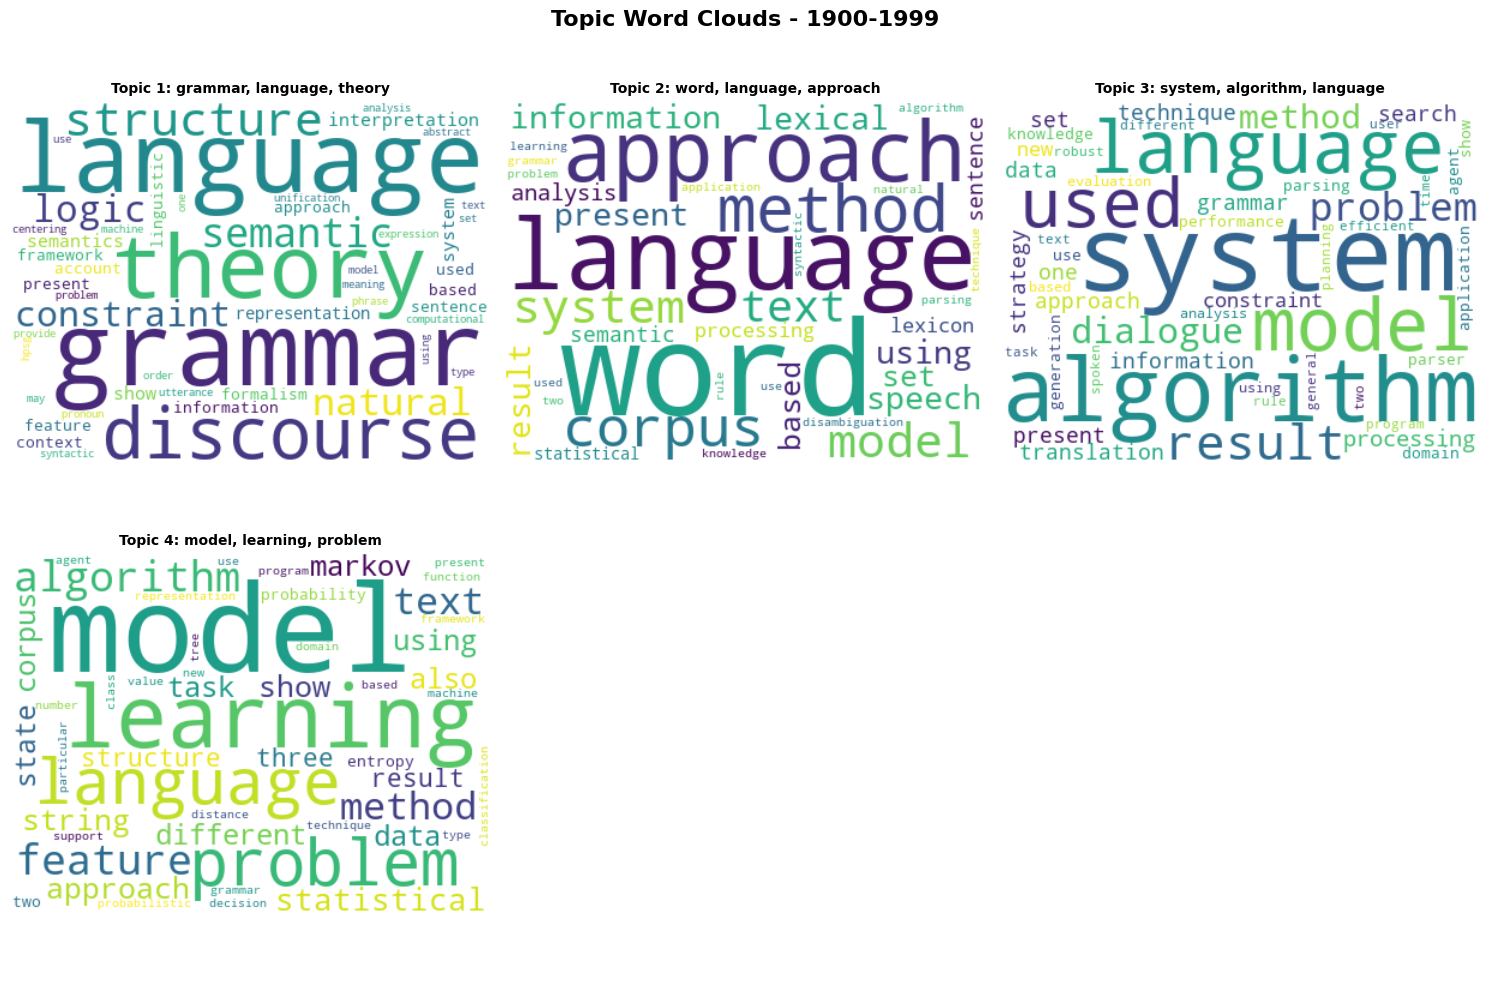

Generated 4 word clouds for 1900-1999


Word Clouds for Year Group: 2000-2004



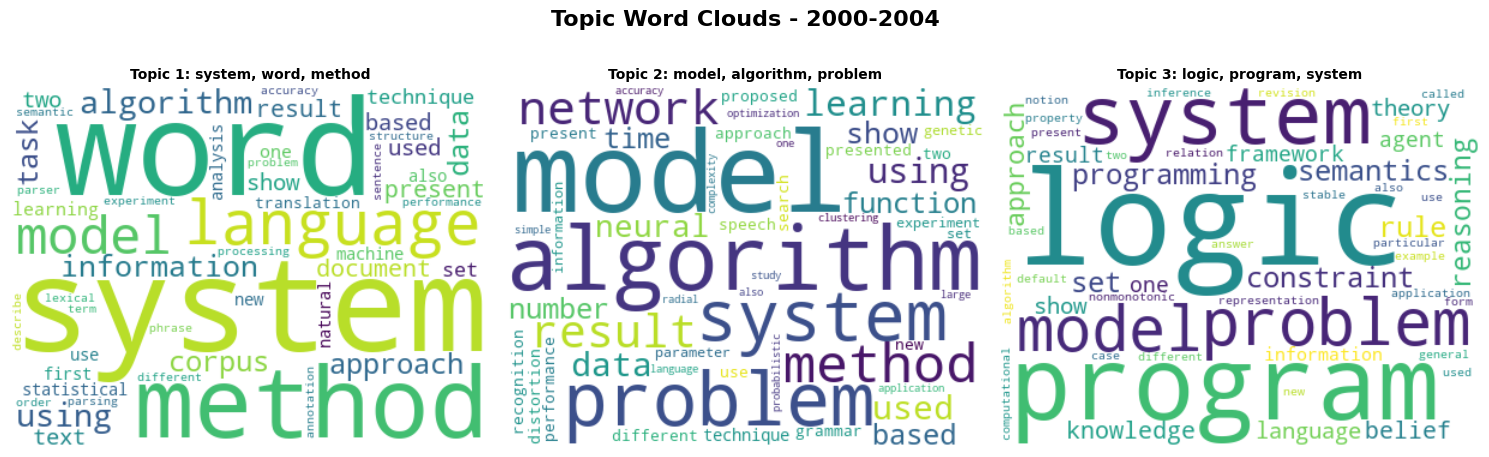

Generated 3 word clouds for 2000-2004


Word Clouds for Year Group: 2005-2009



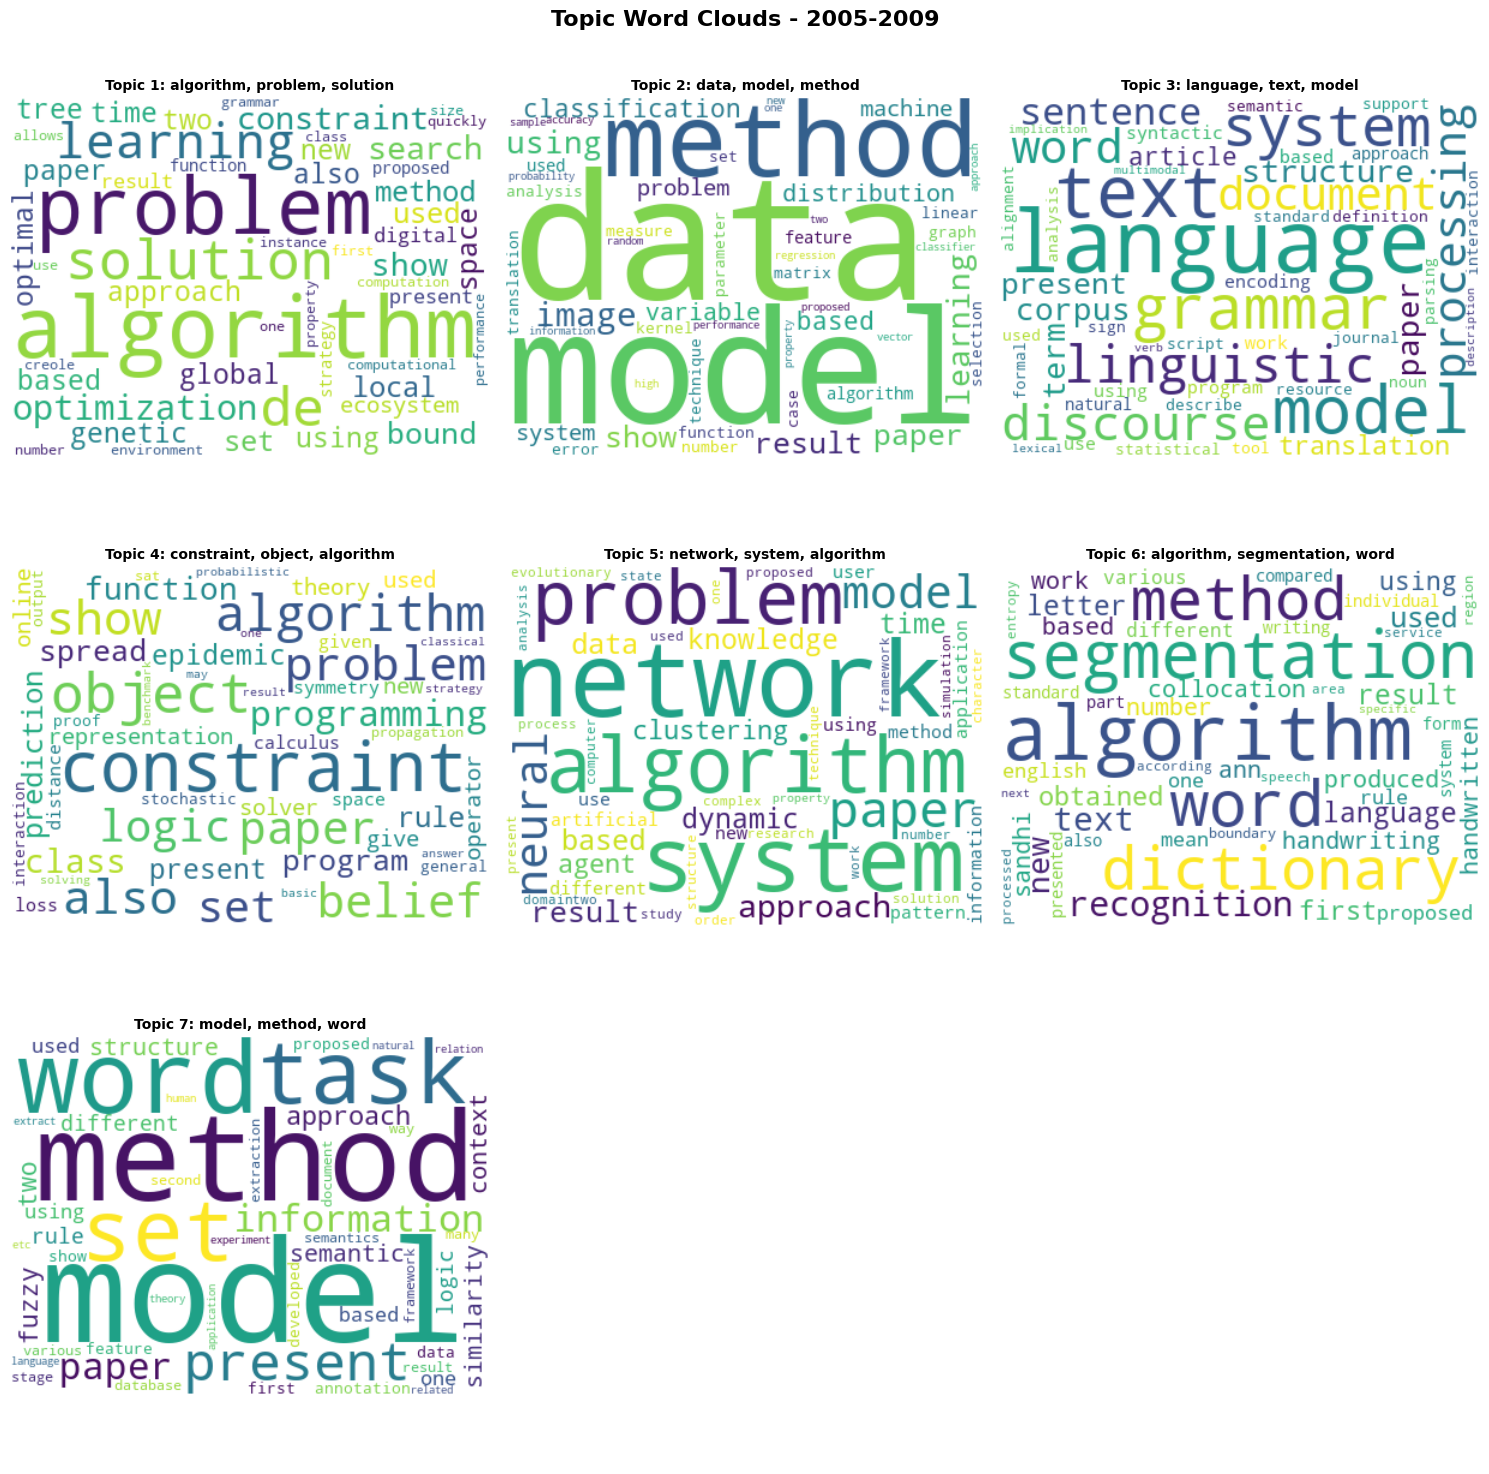

Generated 7 word clouds for 2005-2009


Word Clouds for Year Group: 2010-2014



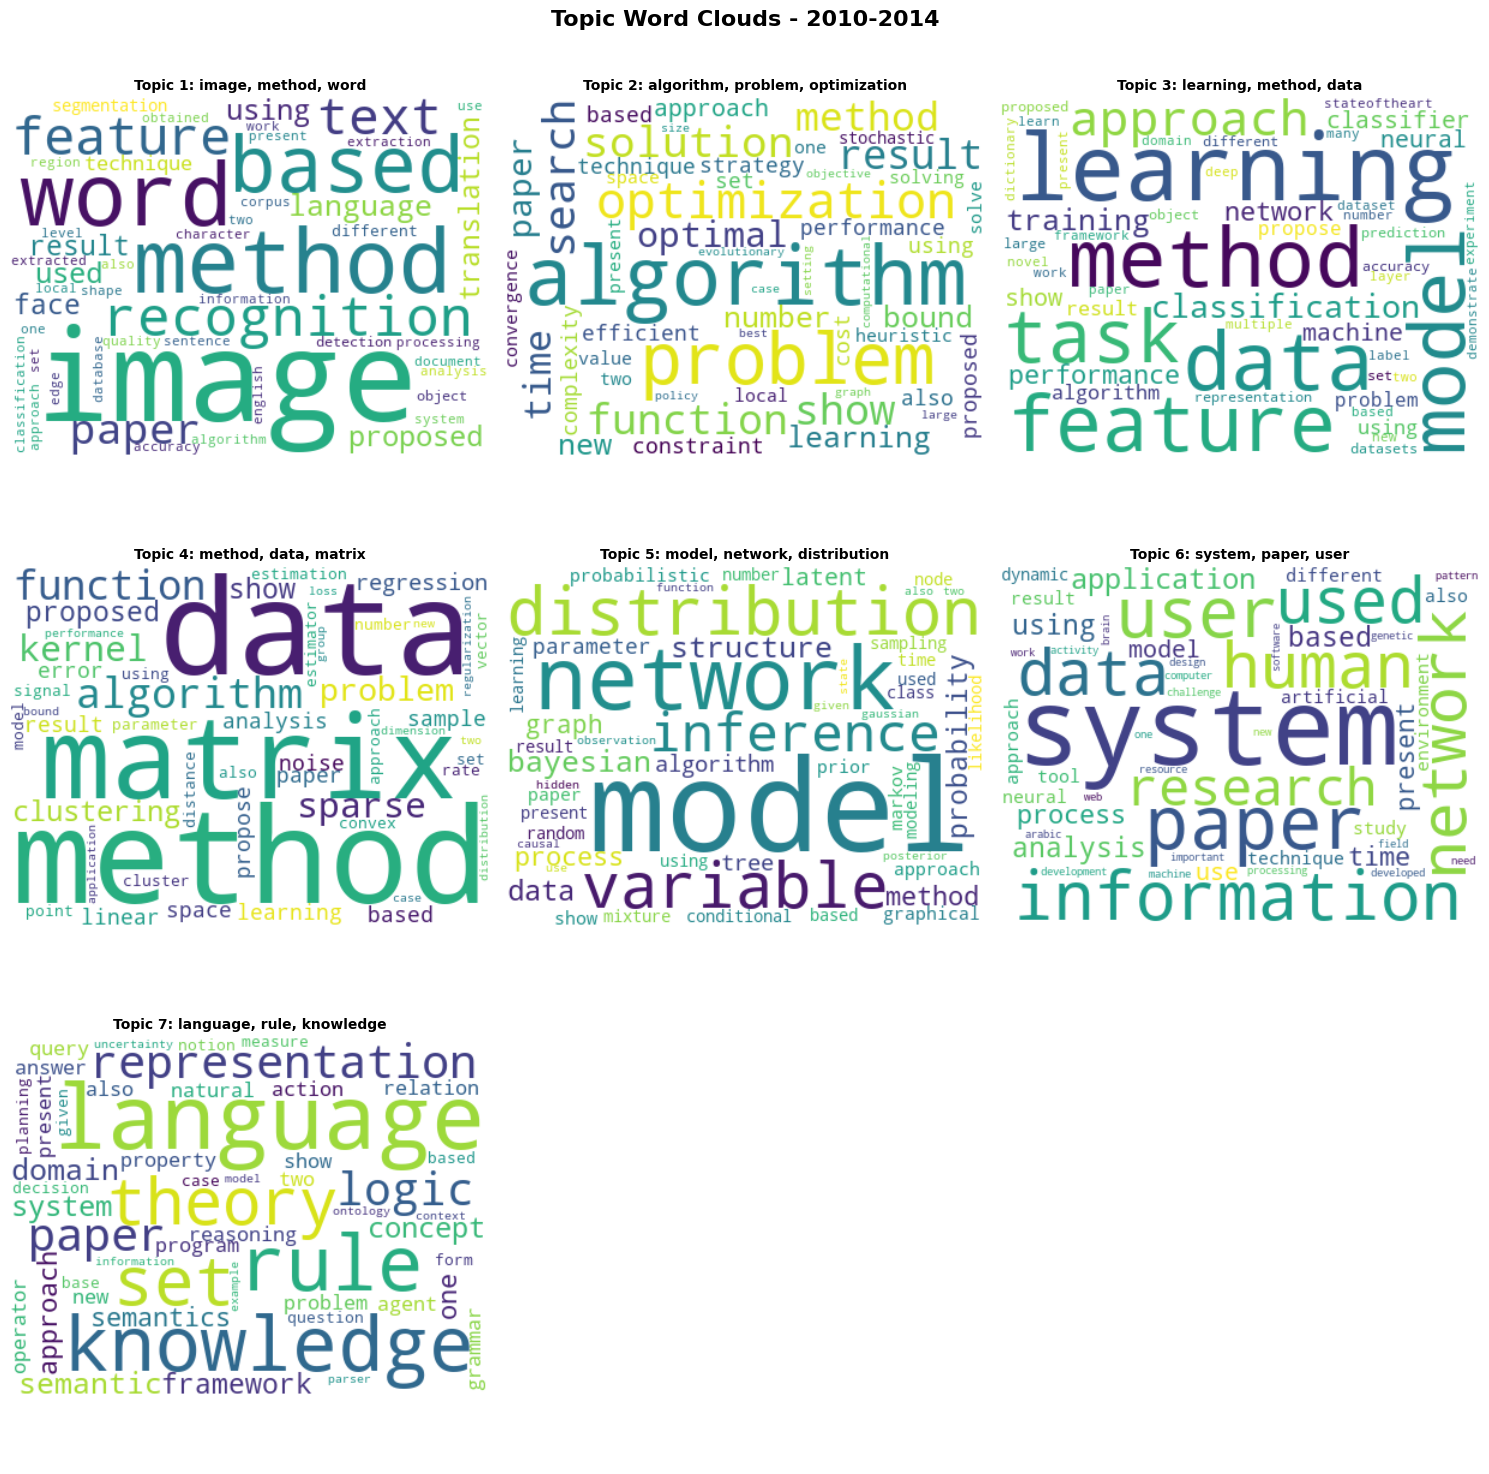

Generated 7 word clouds for 2010-2014


Word Clouds for Year Group: 2015-2019



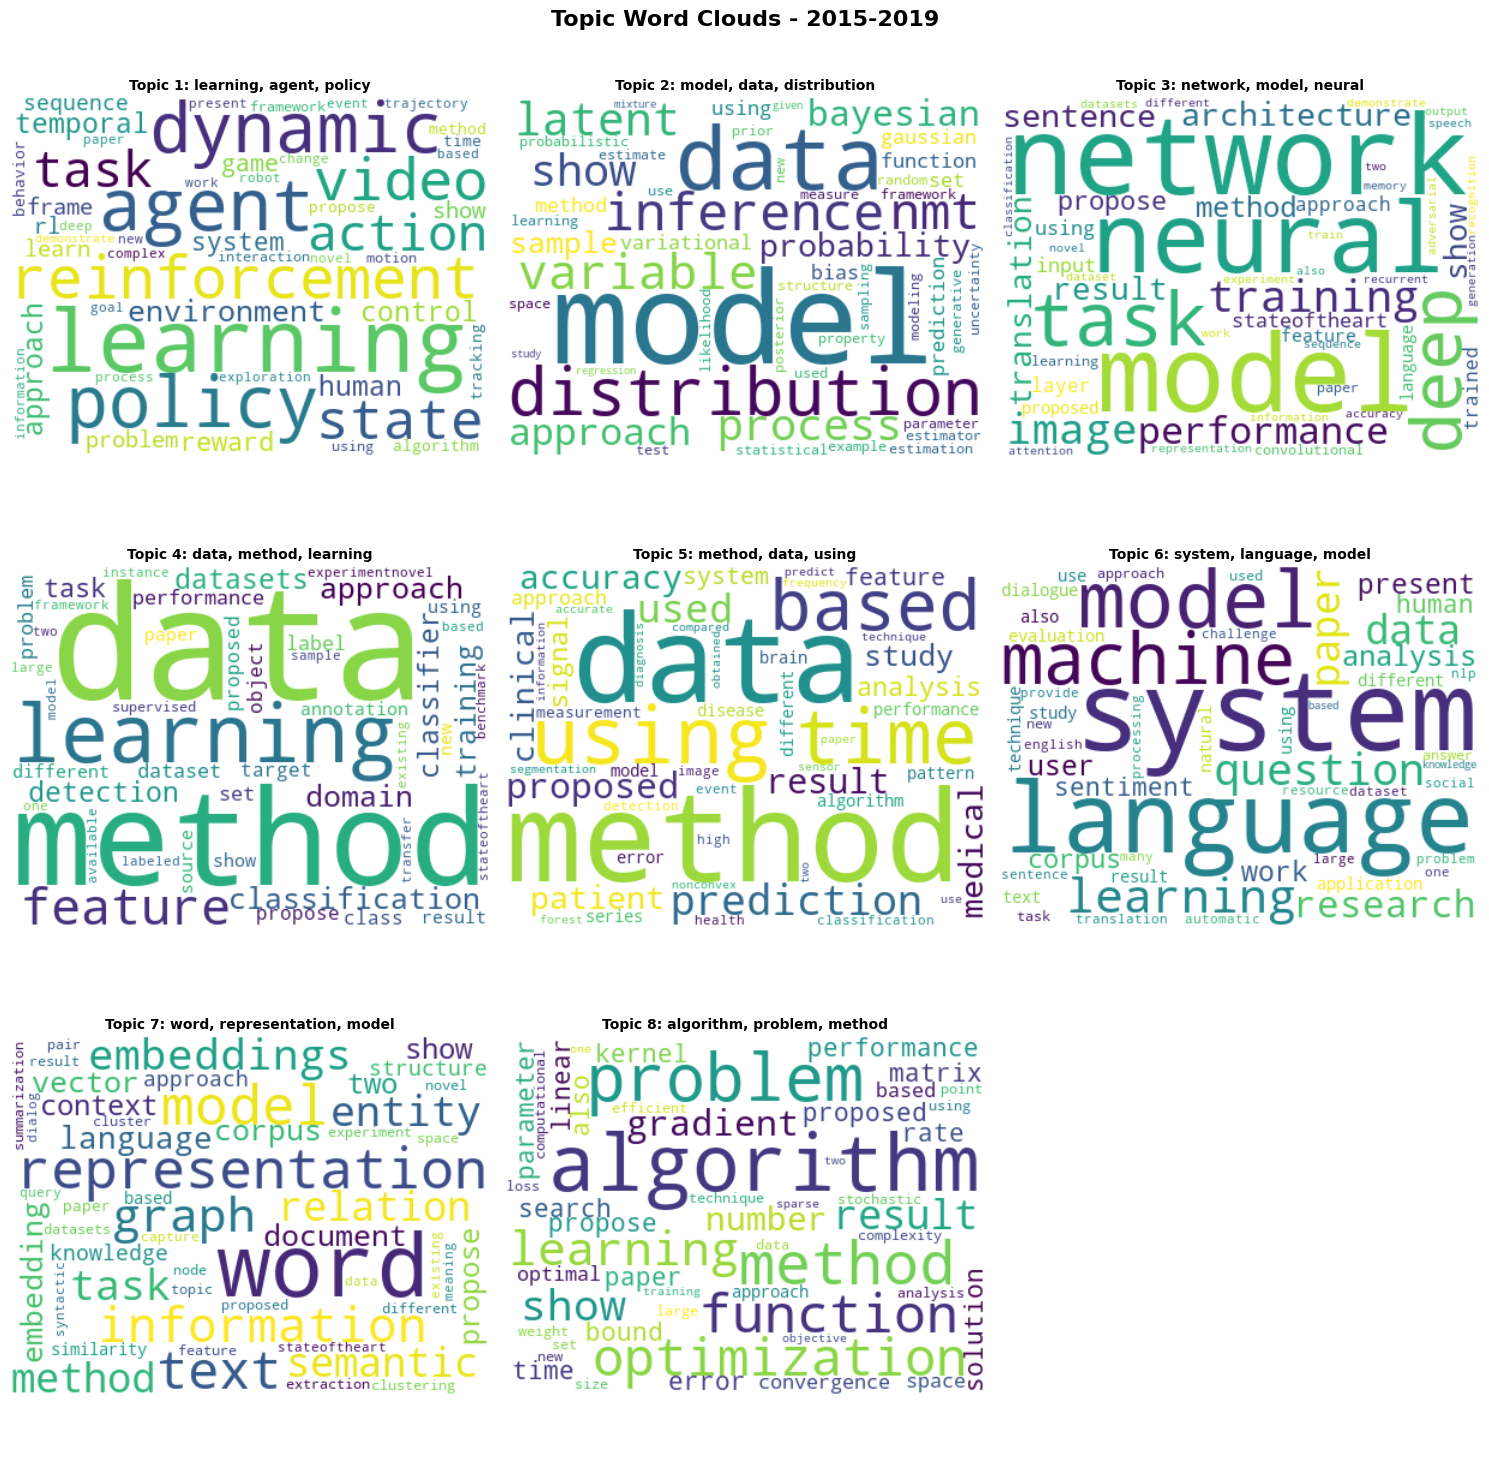

Generated 8 word clouds for 2015-2019


Word Clouds for Year Group: 2020-2025



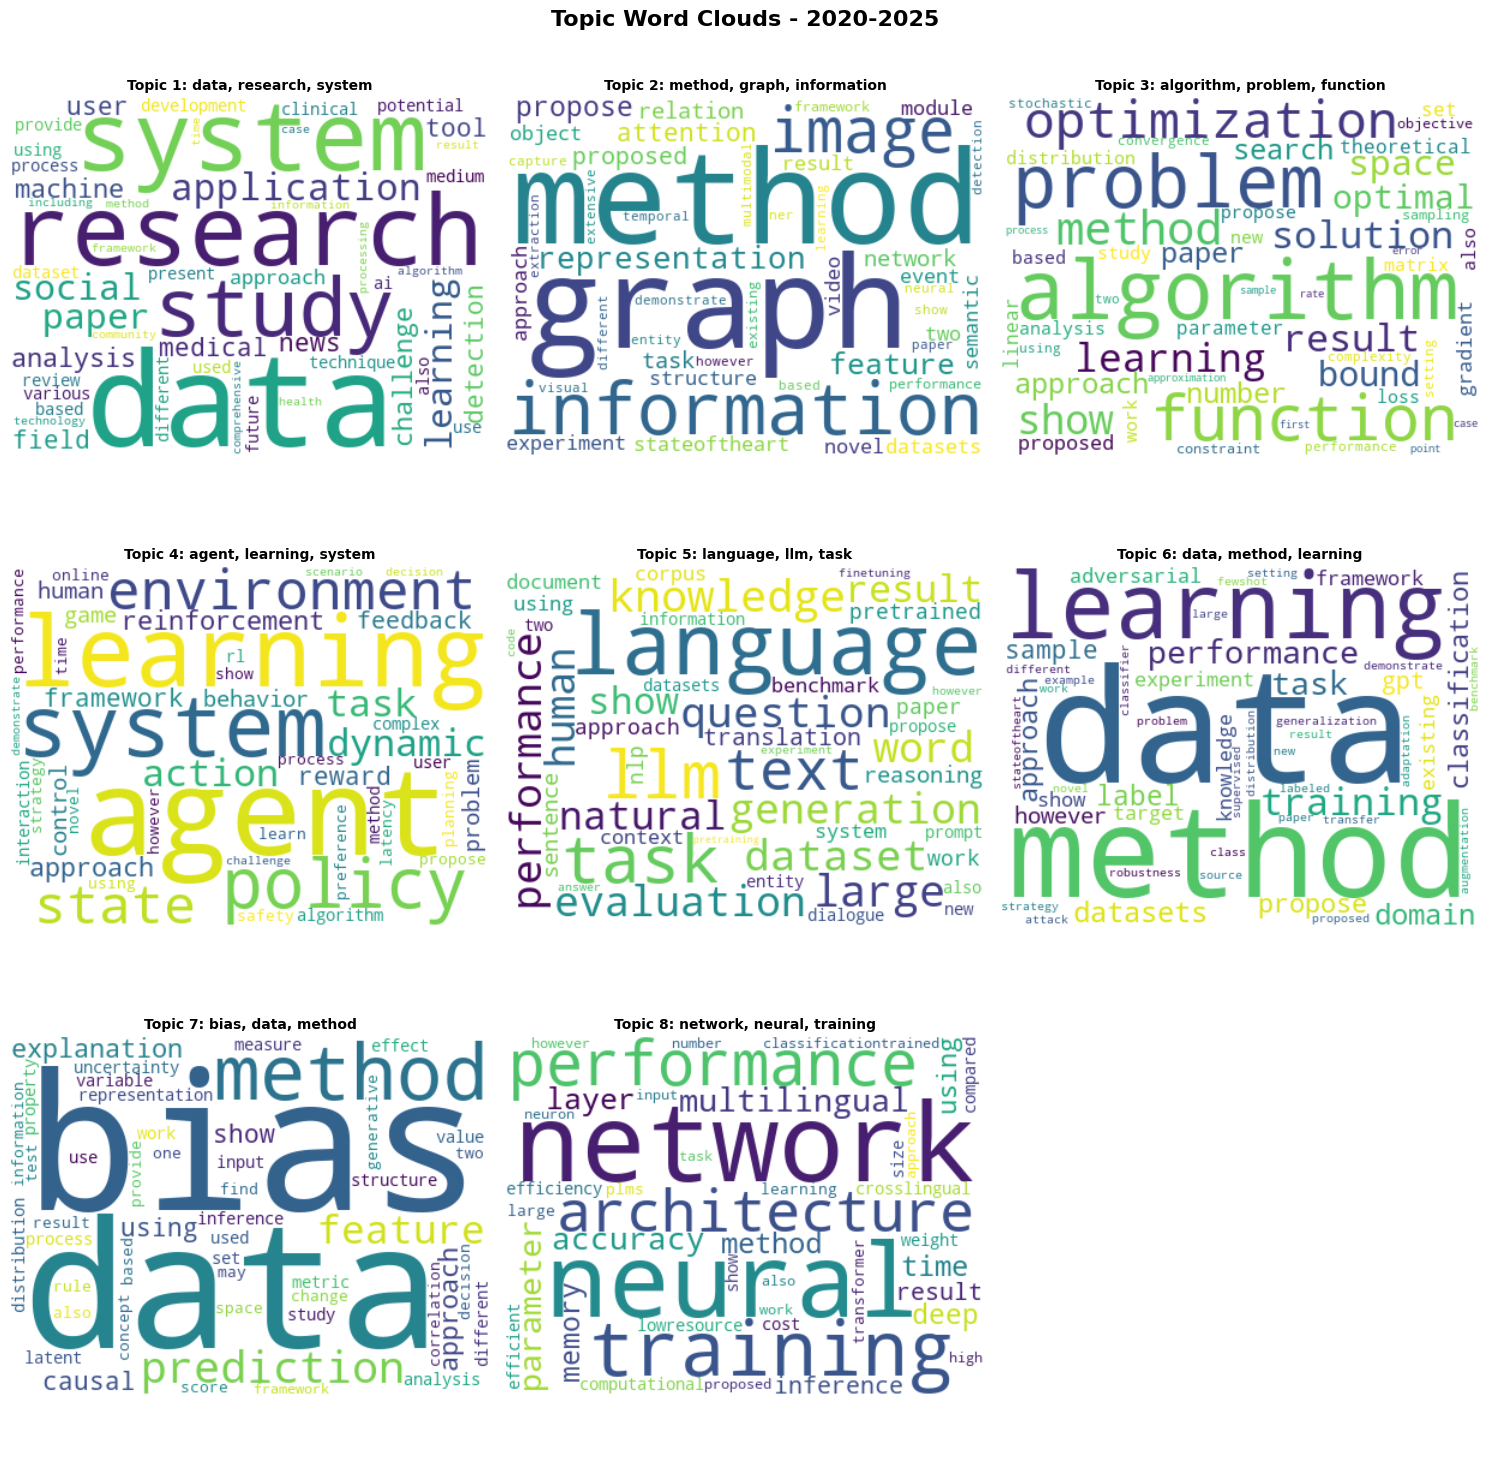

Generated 8 word clouds for 2020-2025



In [12]:
%pip install wordcloud matplotlib

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for each topic in each year group
for year_group, (lda_model, num_topics, dataframe) in ldas.items():
    print(f"\n{'='*70}")
    print(f"Word Clouds for Year Group: {year_group}")
    print(f"{'='*70}\n")

    # Calculate grid size for subplots
    cols = 3
    rows = (num_topics + cols - 1) // cols  # Ceiling division

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    fig.suptitle(f'Topic Word Clouds - {year_group}', fontsize=16, fontweight='bold')

    # Flatten axes array for easier iteration
    if rows == 1 and cols == 1:
        axes = [axes]
    elif rows == 1 or cols == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()

    for topic_id in range(num_topics):
        ax = axes[topic_id]

        # Get top 50 words for this topic
        topic_words = lda_model.show_topic(topic_id, topn=50)

        # Create word frequency dictionary
        word_freq = {word: float(weight) for word, weight in topic_words}

        # Generate word cloud
        wordcloud = WordCloud(
            width=400,
            height=300,
            background_color='white',
            colormap='viridis',
            relative_scaling=0.5,
            min_font_size=8
        ).generate_from_frequencies(word_freq)

        # Display word cloud
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')

        # Get top 3 words for title
        top_words = ', '.join([word for word, _ in topic_words[:3]])
        ax.set_title(f'Topic {topic_id + 1}: {top_words}', fontsize=10, fontweight='bold')

    # Hide any unused subplots
    for idx in range(num_topics, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Generated {num_topics} word clouds for {year_group}\n")

### Visualize Model Performance

Compare coherence and perplexity scores across different year groups.

### Hyperparameter Optimization Trials

Visualize how coherence and perplexity scores changed across different topic counts during Bayesian optimization.


Optimization Trials for 1900-1999

All Trials:
 trial  num_topics  coherence  perplexity
     0           3   0.319276  163.762713
     1           4   0.345619  167.122650
     2           5   0.311416  169.784428
     3           6   0.299856  172.741566
     4           7   0.310022  175.649962
     5           8   0.296805  178.037415


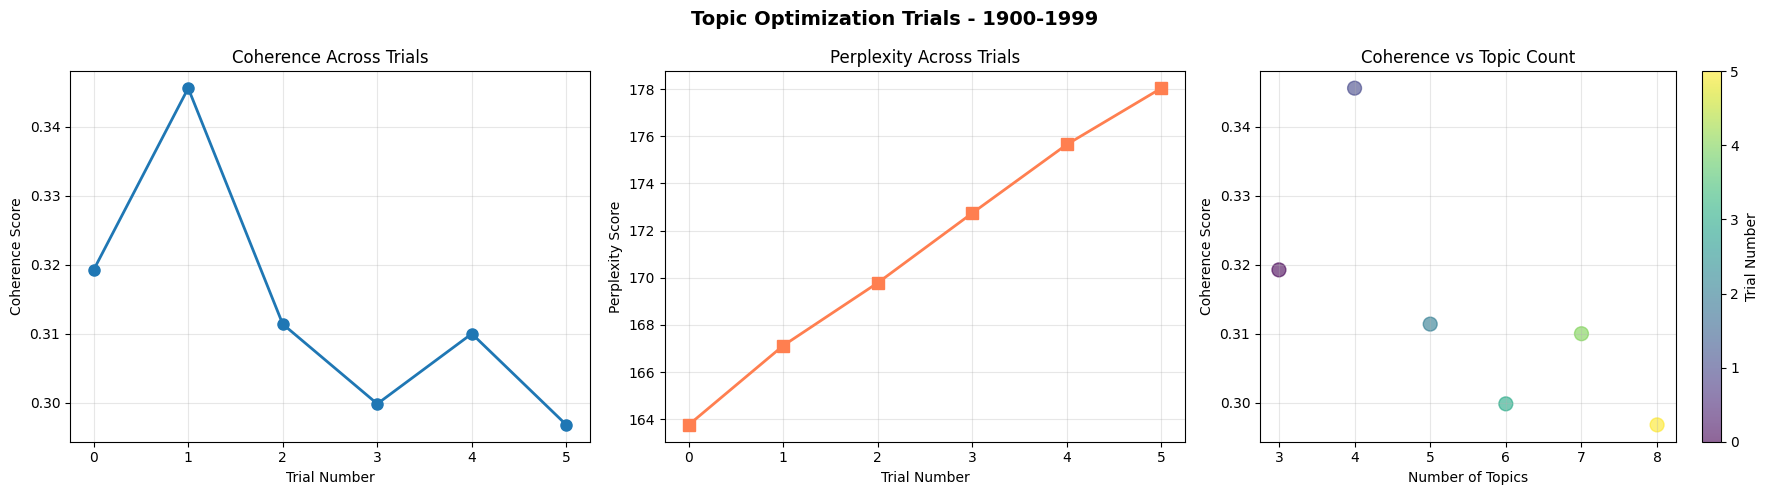


Best Trial:
  Trial Number: 1
  Topics: 4
  Coherence: 0.3456
  Perplexity: 167.1227


Optimization Trials for 2000-2004

All Trials:
 trial  num_topics  coherence  perplexity
     0           3   0.378140  161.692585
     1           4   0.347455  164.810715
     2           5   0.340580  166.898519
     3           6   0.355039  169.501803
     4           7   0.344330  170.783020
     5           8   0.306553  172.089639


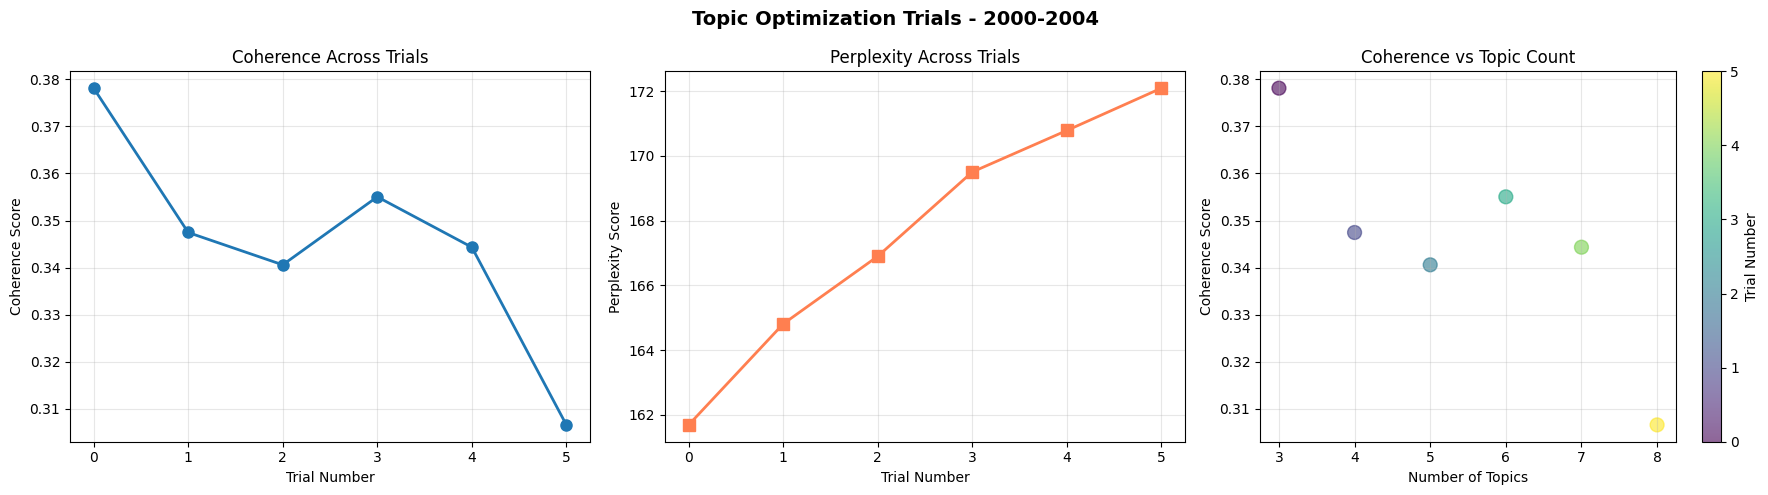


Best Trial:
  Trial Number: 0
  Topics: 3
  Coherence: 0.3781
  Perplexity: 161.6926


Optimization Trials for 2005-2009

All Trials:
 trial  num_topics  coherence  perplexity
     0           3   0.310500  186.926898
     1           4   0.323723  189.429328
     2           5   0.330576  184.868843
     3           6   0.334107  189.221511
     4           7   0.348658  196.408470
     5           8   0.294183  199.254643


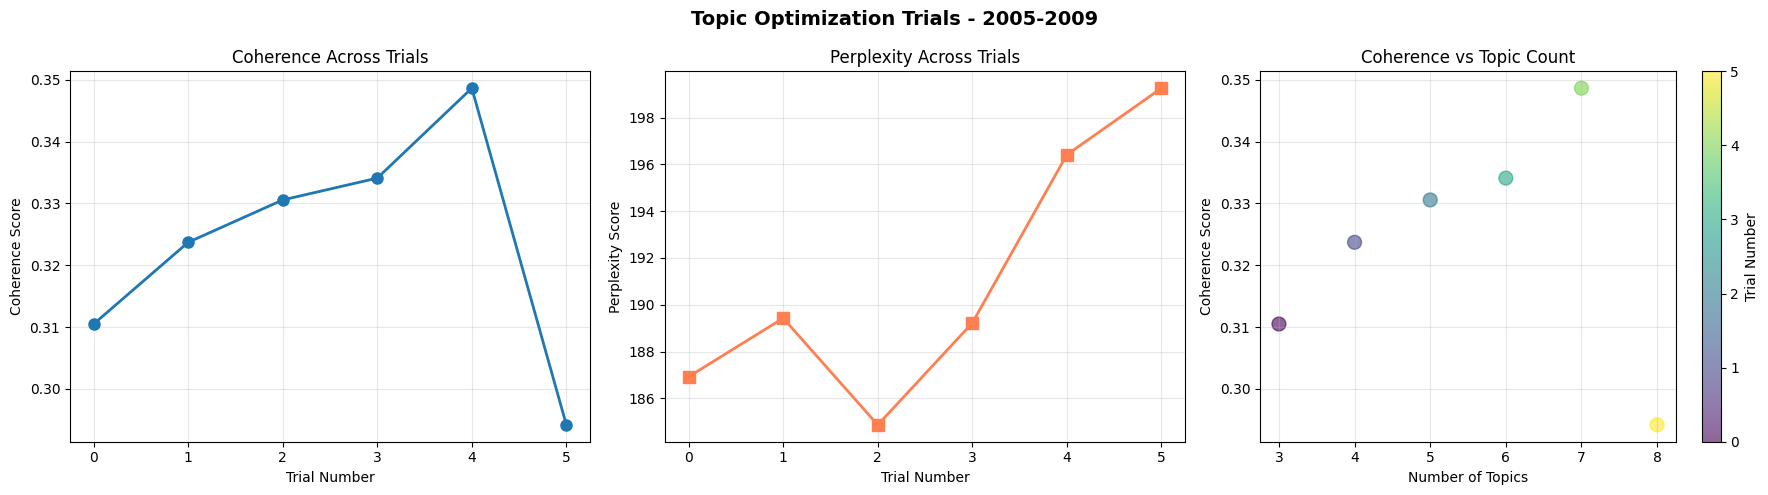


Best Trial:
  Trial Number: 4
  Topics: 7
  Coherence: 0.3487
  Perplexity: 196.4085


Optimization Trials for 2010-2014

All Trials:
 trial  num_topics  coherence  perplexity
     0           3   0.328154  181.628256
     1           4   0.354212  180.366945
     2           5   0.391849  180.373414
     3           6   0.387405  179.861833
     4           7   0.397534  181.276938
     5           8   0.376534  182.998645


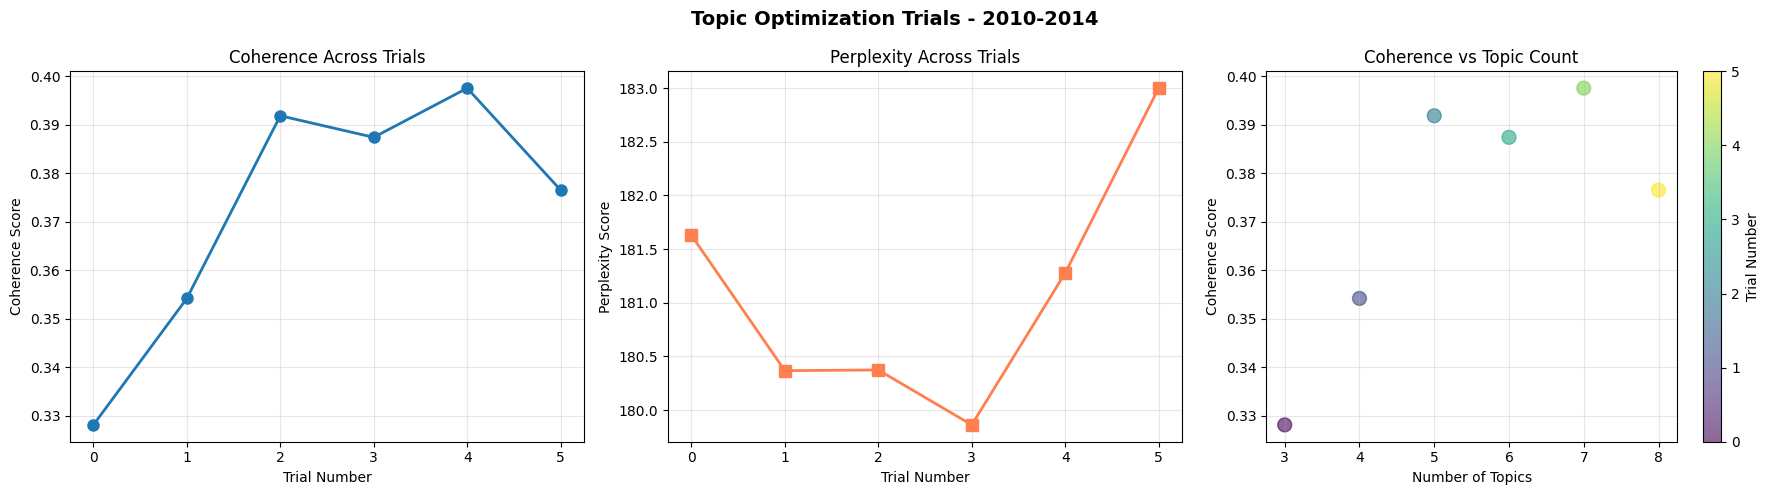


Best Trial:
  Trial Number: 4
  Topics: 7
  Coherence: 0.3975
  Perplexity: 181.2769


Optimization Trials for 2015-2019

All Trials:
 trial  num_topics  coherence  perplexity
     0           3   0.313991  181.322134
     1           4   0.347966  179.001660
     2           5   0.355056  177.952055
     3           6   0.386680  176.954112
     4           7   0.403869  176.017694
     5           8   0.413449  177.033210


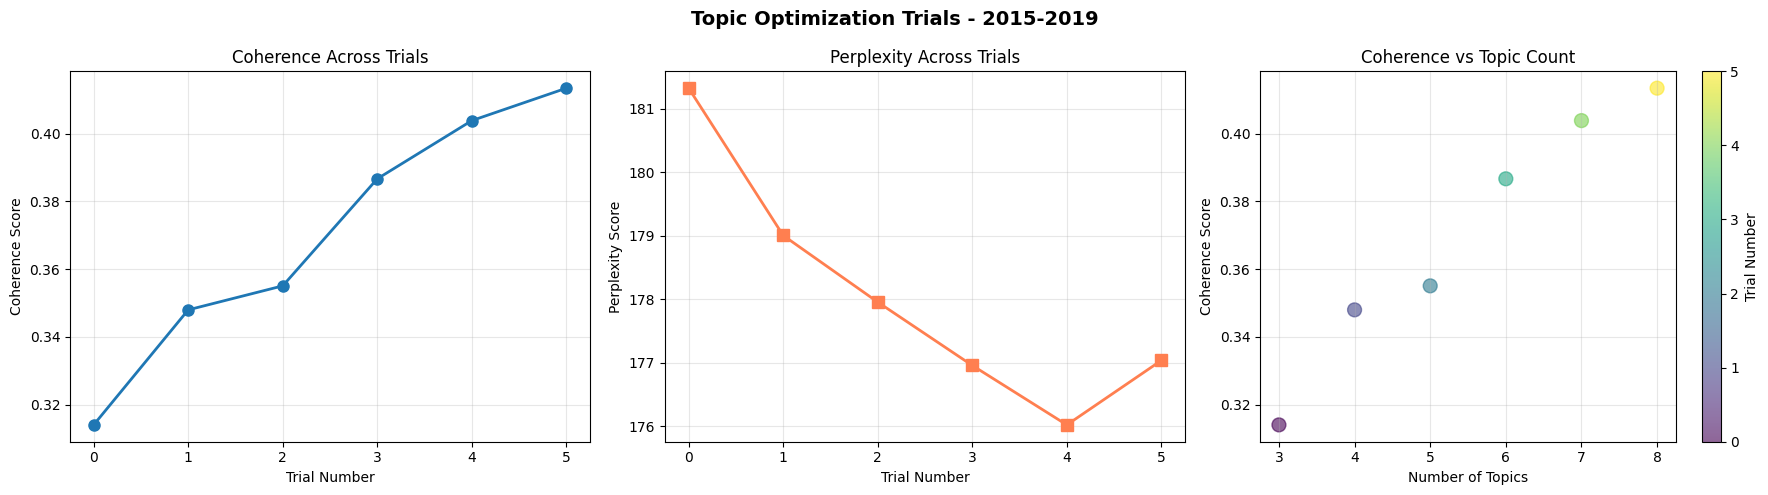


Best Trial:
  Trial Number: 5
  Topics: 8
  Coherence: 0.4134
  Perplexity: 177.0332


Optimization Trials for 2020-2025

All Trials:
 trial  num_topics  coherence  perplexity
     0           3   0.329232  192.854203
     1           4   0.339847  183.914525
     2           5   0.340285  181.444515
     3           6   0.367108  181.558342
     4           7   0.367172  182.746829
     5           8   0.408370  183.748716


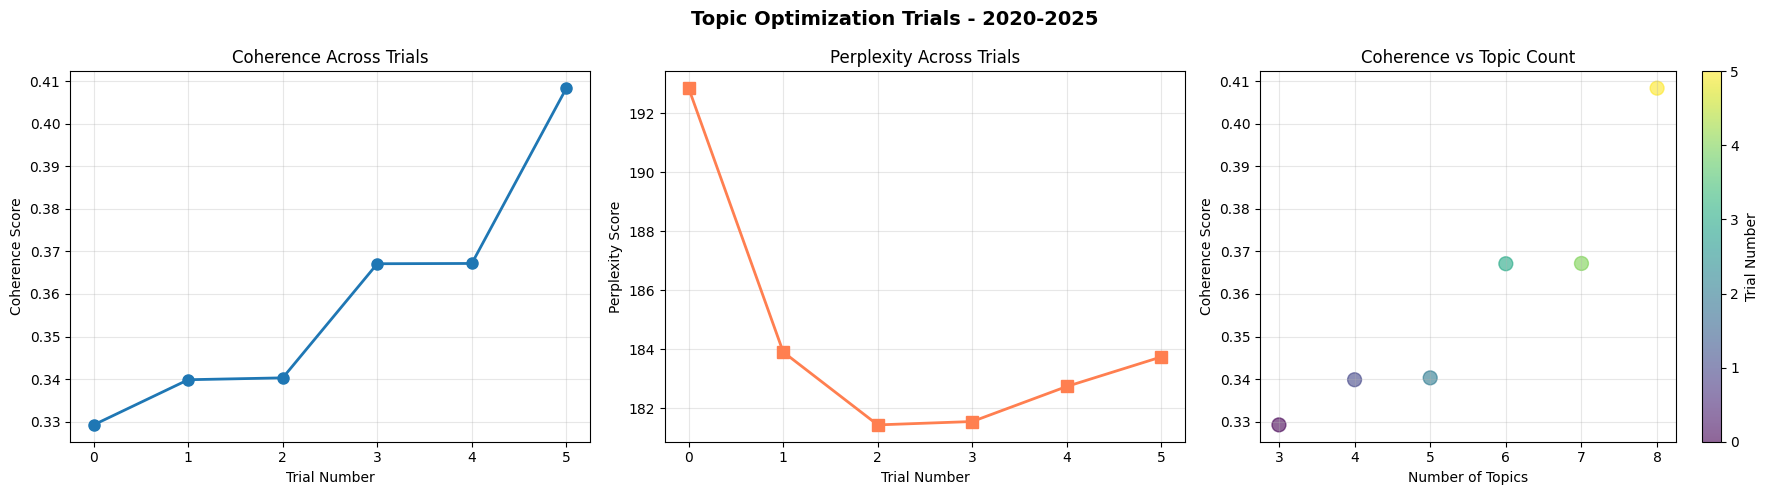


Best Trial:
  Trial Number: 5
  Topics: 8
  Coherence: 0.4084
  Perplexity: 183.7487


SUMMARY OF ALL TRIALS

Total trials across all year groups: 36

Trials per year group:
year_group
1900-1999    6
2000-2004    6
2005-2009    6
2010-2014    6
2015-2019    6
2020-2025    6
dtype: int64

Topic count range tested: 3 - 8
Coherence range: 0.2942 - 0.4134
Perplexity range: 161.6926 - 199.2546


In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Visualize trials for each year group
for year_group, trials_history in all_trials.items():
    if not trials_history:
        continue
    
    print(f"\n{'='*70}")
    print(f"Optimization Trials for {year_group}")
    print(f"{'='*70}")
    
    # Convert to DataFrame for easier manipulation
    trials_df = pd.DataFrame(trials_history)
    
    # Display trials table
    print("\nAll Trials:")
    print(trials_df.to_string(index=False))
    
    # Create visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Topic Optimization Trials - {year_group}', fontsize=14, fontweight='bold')
    
    # 1. Coherence vs Trial Number
    ax1 = axes[0]
    ax1.plot(trials_df['trial'], trials_df['coherence'], marker='o', linewidth=2, markersize=8)
    ax1.set_xlabel('Trial Number')
    ax1.set_ylabel('Coherence Score')
    ax1.set_title('Coherence Across Trials')
    ax1.grid(True, alpha=0.3)
    
    # 2. Perplexity vs Trial Number
    ax2 = axes[1]
    ax2.plot(trials_df['trial'], trials_df['perplexity'], marker='s', color='coral', linewidth=2, markersize=8)
    ax2.set_xlabel('Trial Number')
    ax2.set_ylabel('Perplexity Score')
    ax2.set_title('Perplexity Across Trials')
    ax2.grid(True, alpha=0.3)
    
    # 3. Coherence vs Number of Topics (scatter)
    ax3 = axes[2]
    scatter = ax3.scatter(trials_df['num_topics'], trials_df['coherence'], 
                         c=trials_df['trial'], cmap='viridis', s=100, alpha=0.6)
    ax3.set_xlabel('Number of Topics')
    ax3.set_ylabel('Coherence Score')
    ax3.set_title('Coherence vs Topic Count')
    ax3.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax3, label='Trial Number')
    
    plt.tight_layout()
    plt.show()
    
    # Print best trial
    best_trial = trials_df.loc[trials_df['coherence'].idxmax()]
    print(f"\nBest Trial:")
    print(f"  Trial Number: {int(best_trial['trial'])}")
    print(f"  Topics: {int(best_trial['num_topics'])}")
    print(f"  Coherence: {best_trial['coherence']:.4f}")
    print(f"  Perplexity: {best_trial['perplexity']:.4f}")
    print()

# Summary of all trials across all year groups
print(f"\n{'='*70}")
print("SUMMARY OF ALL TRIALS")
print(f"{'='*70}\n")

all_trials_combined = []
for year_group, trials_history in all_trials.items():
    for trial in trials_history:
        all_trials_combined.append({
            'year_group': year_group,
            'trial': trial['trial'],
            'num_topics': trial['num_topics'],
            'coherence': trial['coherence'],
            'perplexity': trial['perplexity']
        })

if all_trials_combined:
    combined_df = pd.DataFrame(all_trials_combined)
    print(f"Total trials across all year groups: {len(combined_df)}")
    print(f"\nTrials per year group:")
    print(combined_df.groupby('year_group').size())
    print(f"\nTopic count range tested: {int(combined_df['num_topics'].min())} - {int(combined_df['num_topics'].max())}")
    print(f"Coherence range: {combined_df['coherence'].min():.4f} - {combined_df['coherence'].max():.4f}")
    print(f"Perplexity range: {combined_df['perplexity'].min():.4f} - {combined_df['perplexity'].max():.4f}")

Note: you may need to restart the kernel to use updated packages.


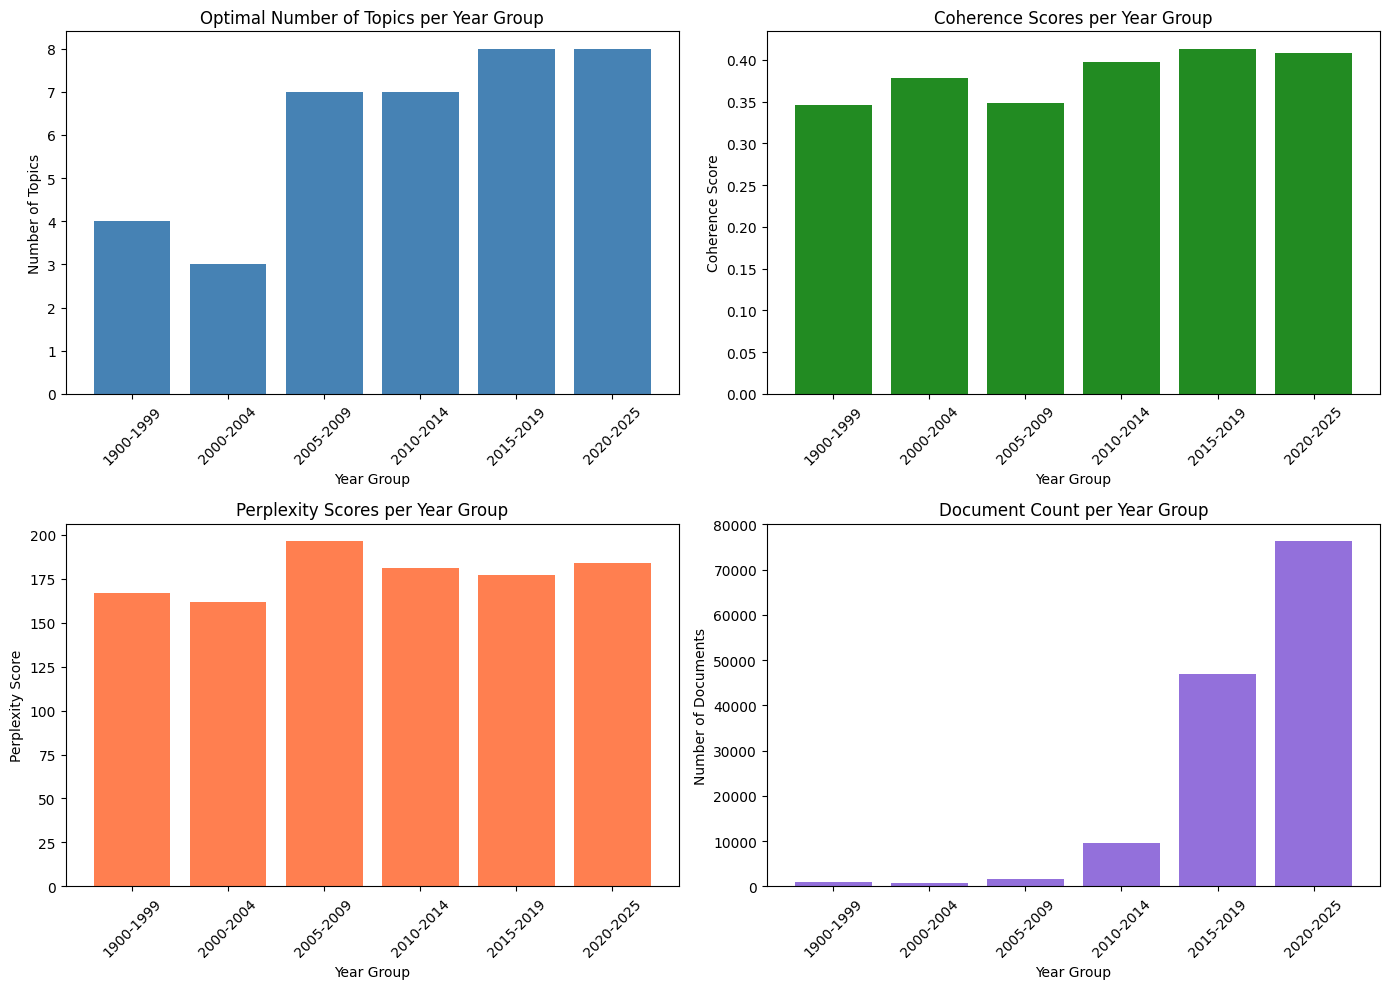


FINAL SUMMARY
year_group  num_topics  coherence  perplexity  num_documents  num_trials
 1900-1999           4   0.345619  167.122650            983           6
 2000-2004           3   0.378140  161.692585            744           6
 2005-2009           7   0.348658  196.408470           1665           6
 2010-2014           7   0.397534  181.276938           9578           6
 2015-2019           8   0.413449  177.033210          46952           6
 2020-2025           8   0.408370  183.748716          76316           6


In [14]:
%pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Number of Topics per Year Group
ax1 = axes[0, 0]
summary_df_sorted = summary_df.sort_values('year_group')
ax1.bar(summary_df_sorted['year_group'], summary_df_sorted['num_topics'], color='steelblue')
ax1.set_xlabel('Year Group')
ax1.set_ylabel('Number of Topics')
ax1.set_title('Optimal Number of Topics per Year Group')
ax1.tick_params(axis='x', rotation=45)

# 2. Coherence Scores
ax2 = axes[0, 1]
ax2.bar(summary_df_sorted['year_group'], summary_df_sorted['coherence'], color='forestgreen')
ax2.set_xlabel('Year Group')
ax2.set_ylabel('Coherence Score')
ax2.set_title('Coherence Scores per Year Group')
ax2.tick_params(axis='x', rotation=45)

# 3. Perplexity Scores
ax3 = axes[1, 0]
ax3.bar(summary_df_sorted['year_group'], summary_df_sorted['perplexity'], color='coral')
ax3.set_xlabel('Year Group')
ax3.set_ylabel('Perplexity Score')
ax3.set_title('Perplexity Scores per Year Group')
ax3.tick_params(axis='x', rotation=45)

# 4. Number of Documents
ax4 = axes[1, 1]
ax4.bar(summary_df_sorted['year_group'], summary_df_sorted['num_documents'], color='mediumpurple')
ax4.set_xlabel('Year Group')
ax4.set_ylabel('Number of Documents')
ax4.set_title('Document Count per Year Group')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)
print(summary_df.to_string(index=False))
print("="*70)